In [10]:
graph = {
    '5':['3','7'],
    '3':['2','4'],
    '7':['8'],
    '2':[],
    '4':['8'],
    '8':[],
}

In [11]:
visited = [] # List for visited nodes.
queue = [] #Initialize a queue
def bfs(visited, graph, node): #function for BFS
    visited.append(node)
    queue.append(node)
    while queue: # Creating loop to visit each node
        m = queue.pop(0)
        print (m, end = " ")
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

In [12]:
# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5') # function calling

Following is the Breadth-First Search
5 3 7 2 4 8 

In [15]:
import networkx as nx
from collections import deque
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path

    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            visit_count += 1  # Increment the visit count

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node if parent_node else '-',
                'QUEUE': ' '.join([n for n, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and neighbour not in [n for n, _ in queue]:  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(df.to_string(index=False))

# Driver Code
print("Following is the Breadth-First Search")
bfs(graph, '5')  # Function calling


Following is the Breadth-First Search

Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
Current Node Parent Node QUEUE Processed Nodes  5 3 7 2 4 8
     5            -                        5   1  - - - - -
     3            5         7            5 3   2  2 - - - -
     7            5       2 4          5 3 7   3  3 3 - - -
     2            3       4 8        5 3 7 2   4  4 4 4 - -
     4            3         8      5 3 7 2 4   5  5 5 5 5 -
     8            7              5 3 7 2 4 8   6  6 6 6 6 6


Following is the Breadth-First Search


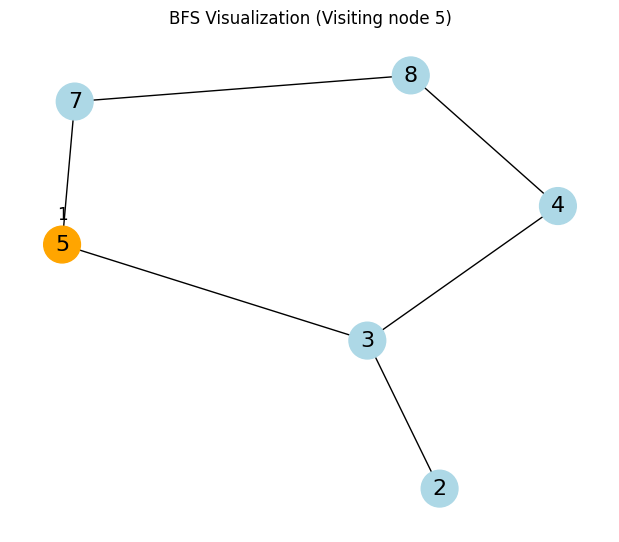

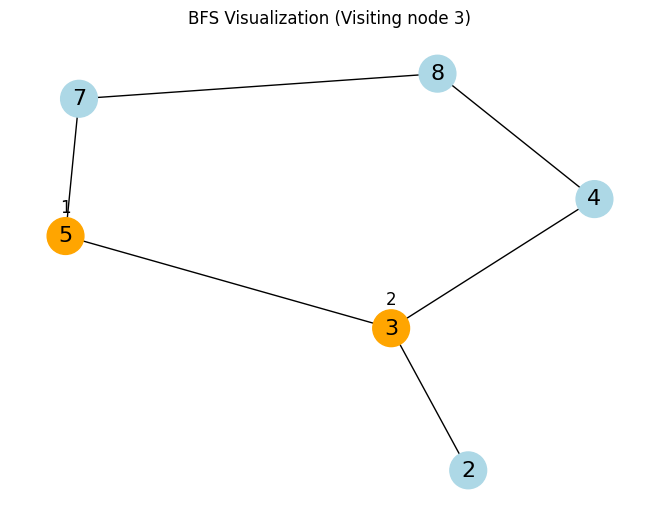

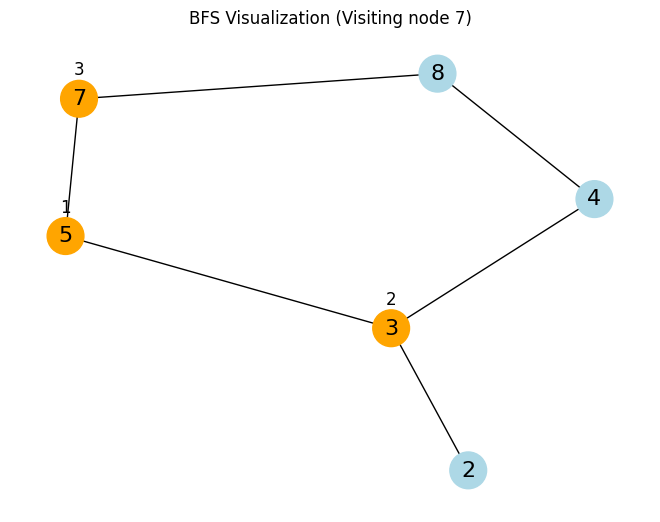

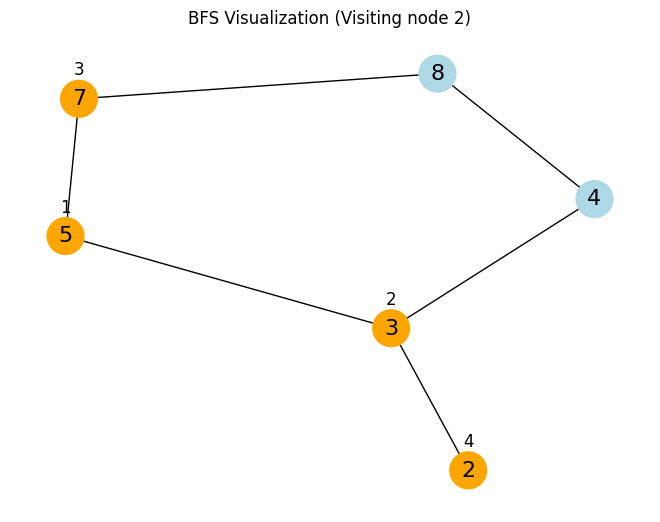

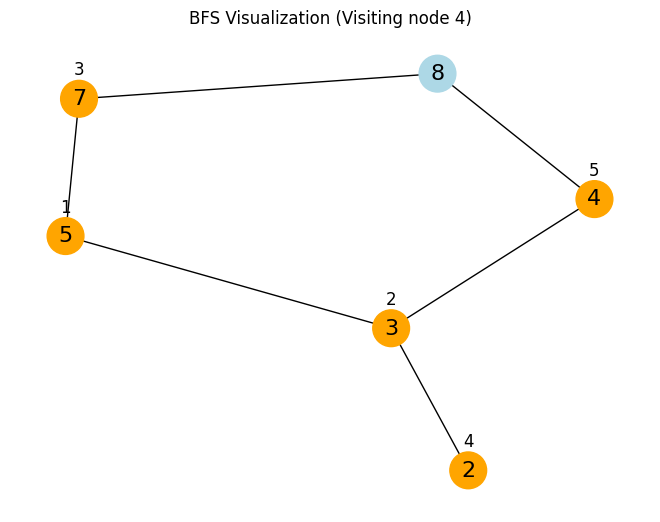

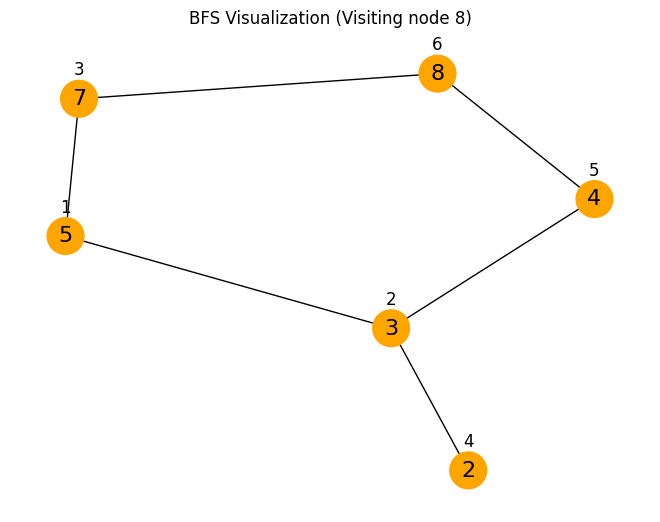


Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
Current Node Parent Node QUEUE Processed Nodes  5 3 7 2 4 8
     5            -                        5   1  - - - - -
     3            5         7            5 3   2  2 - - - -
     7            5       2 4          5 3 7   3  3 3 - - -
     2            3       4 8        5 3 7 2   4  4 4 4 - -
     4            3         8      5 3 7 2 4   5  5 5 5 5 -
     8            7              5 3 7 2 4 8   6  6 6 6 6 6


In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(visited.index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"BFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node if parent_node else '-',
                'QUEUE': ' '.join([node for node, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and all(neighbour != n for n, _ in queue):  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(df.to_string(index=False))

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling


Following is the Breadth-First Search


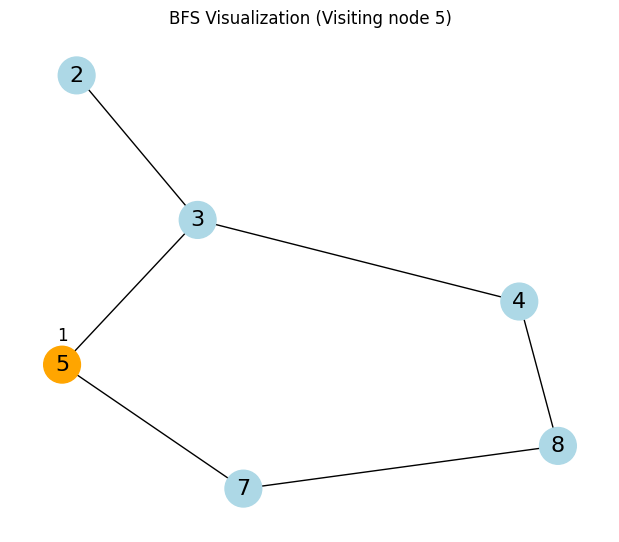

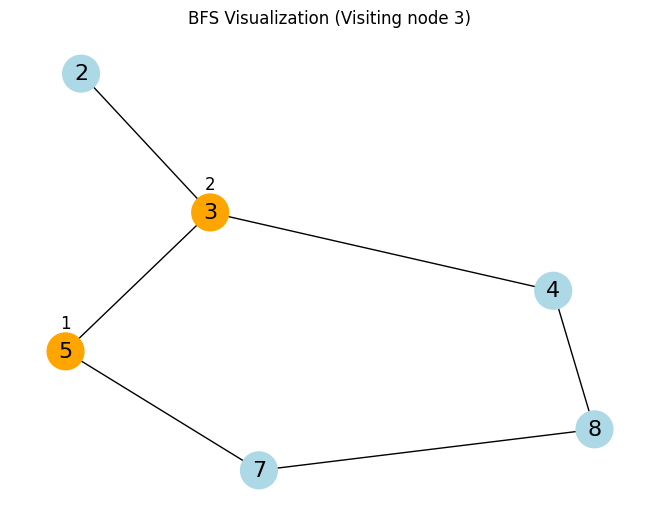

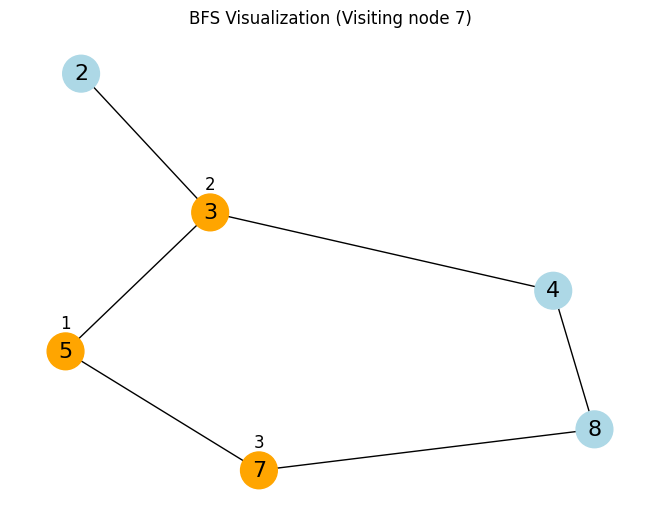

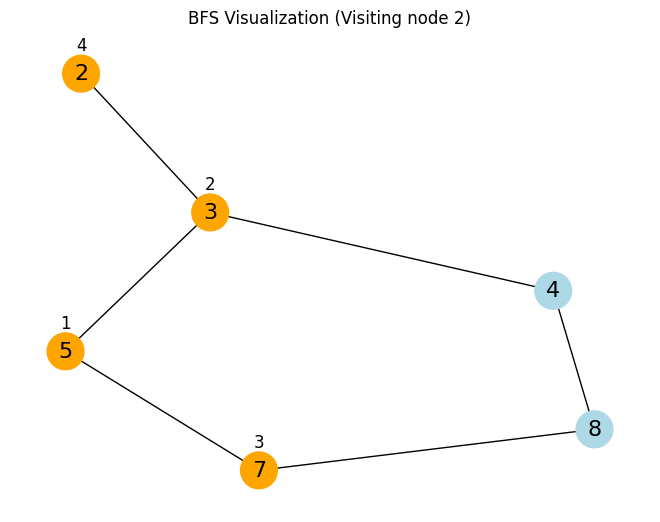

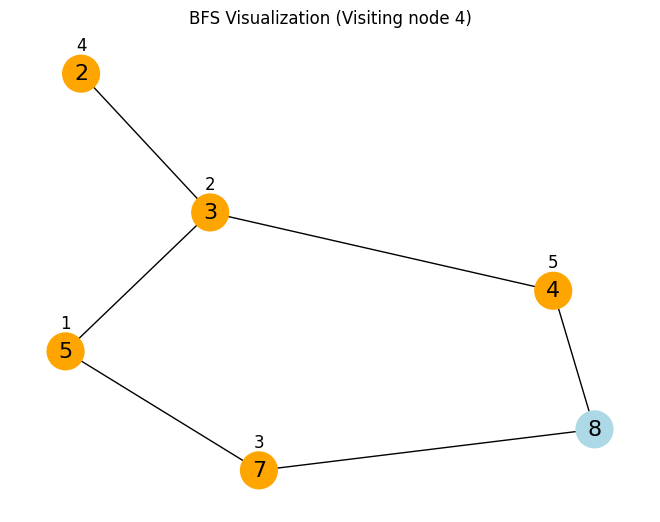

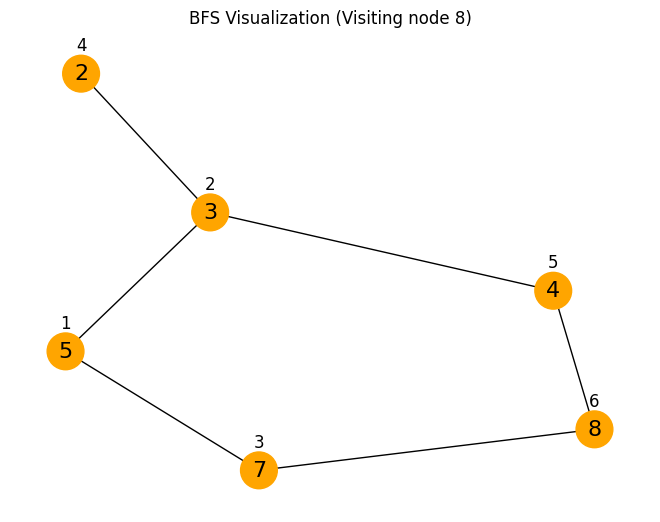


Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|    |   Current Node |   Parent Node | QUEUE   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
+====+================+===============+=========+===================+=====+=====+=====+=====+=====+=====+
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|  1 |              3 |             5 | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|  2 |              7 |             5 | 2 4     | 5 3 7             |   3 | 3   | 3   | -   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+---

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import pandas as pd
from tabulate import tabulate

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(visited.index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"BFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'QUEUE': ' '.join([node for node, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and all(neighbour != n for n, _ in queue):  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(tabulate(df, headers='keys', tablefmt='grid'))

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling
